# Stack Academy - Data Science do Zero

# Módulo 09 - Machine Learning

## SVM - Suport Vectors Machine

# 9.42 - SVM - Criando um Classificador SVM para classificar Flores

* SVM aplicado na classificação de flores e na classificação de músicas do Spotify.
* O SVM será utilizado para criação de classificador que identifica possíveis músicas que um usuário poderia gostar.
* Iremos treinar o algoritmo, validar o modelo e fazer tunning dos parâmetros do SVM.

## Scripts e Base de dados

- A base de dados de **músicas do Spotify** bem como o **notebook com os scripts** dessa aula podem ser baixados em nosso Github, [aqui](https://github.com/minerandodados/mdrepo/blob/master/petr4_1_2010_11_2017.csv)
- Base de dasos Iris, para conhecer clique [aqui](https://archive.ics.uci.edu/ml/datasets/iris)

**Bibliotecas utilizadas**

In [33]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')

**Importando dataset Iris**

In [2]:
from sklearn import datasets

In [3]:
# Carregando o dataset para o array chamado iris
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
# Visualizando o nome das features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# Nome das Classes
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# Separando dados de treino.
treino = iris.data

In [8]:
# Separando dados de classes.
classes = iris.target

In [9]:
# Visualizando a forma do array dos dados de treino.
# Formato (linhas,colunas).
treino.shape

(150, 4)

In [10]:
# Visualizando os dados de treino.
treino[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [11]:
# Visualizando a forma do array de classes.
classes.shape

(150,)

In [12]:
# Visualizando os dados únicos do array de classes.
set(classes)

{0, 1, 2}

In [13]:
# Visualizando os dados de classes.
classes[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 9.43 - SVM - Visualizando o Desempenho do Classificador SVM

# Visualização de dados

* **Visualizando a disperssão de dados quanto a classe**

<IPython.core.display.Javascript object>


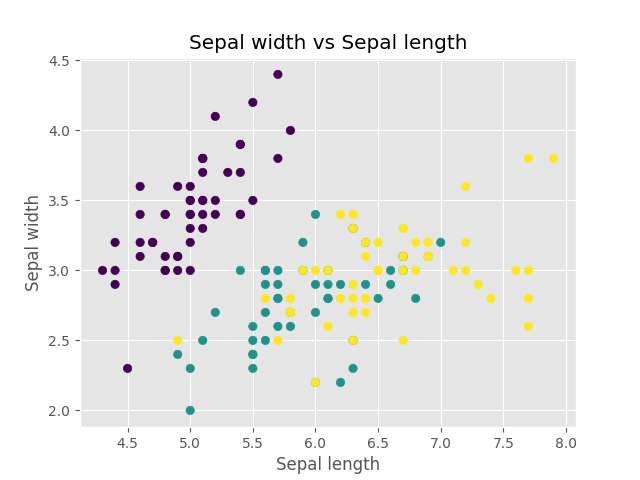

In [14]:
# Plota gráfico de dispersão dos dados com relação a classe.
# Dispersão dos dados de Sepal width e Sepal Length com as classes(0,1,2)
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
#sepal length vs sepal width
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[:,0],treino[:,1], c=classes) # c=cor, set com as classes para destacar cada uma

<IPython.core.display.Javascript object>


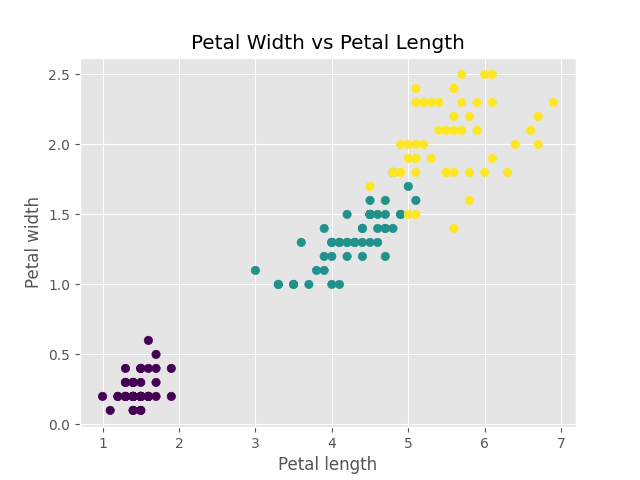

In [15]:
# Plota gráfico de dispersão dos dados com relação a classe.
# Dispersão dos dados de Petal width e Petal Length com as classes(0,1,2)
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width vs Petal Length')
plt.scatter(treino[:,2], treino[:,3], c=classes)

# Aplicando o SVM

* Vamos agora aplicar o SVM para classificar flores usando a base de dados Iris.

In [16]:
# Usaremos 80% dos dados para treino e 20% para teste.
# Visualizando o tamanho dos dados de treino.
len(treino[:-30]), len(classes[:-30])

(120, 120)

In [17]:
# Visualizando os dados de treino
treino[:-30]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
# Visualiando as classes correspondentes
classes[:-30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
# Treinando o algoritmo de SVM.
clf = svm.SVC().fit(treino[:-30],classes[:-30])

# SVC() é um método do algoritmo SVM

In [20]:
# Objeto clf: Classificador
clf

SVC()

In [21]:
# Cria um array com os dados de teste
# 20% dos dados que não foram testados
teste = treino[-30:]

In [22]:
# Visualizando os dados de teste
teste

array([[6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 3.1, 5.5, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [23]:
# Predizendo valores com a porção de dados de teste
clf.predict(teste)

array([2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 1])

In [24]:
# Cria um array com as classes dos dados de teste - Reais
classes_teste = classes[-30:]

In [25]:
# Visualizando as classes de teste - Reais
classes_teste

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

# 9.44 - SVM - Visualizando o Desempenho do Classificador e Avaliando o Modelo

## Visualizando os Resultados de Classificação

<IPython.core.display.Javascript object>


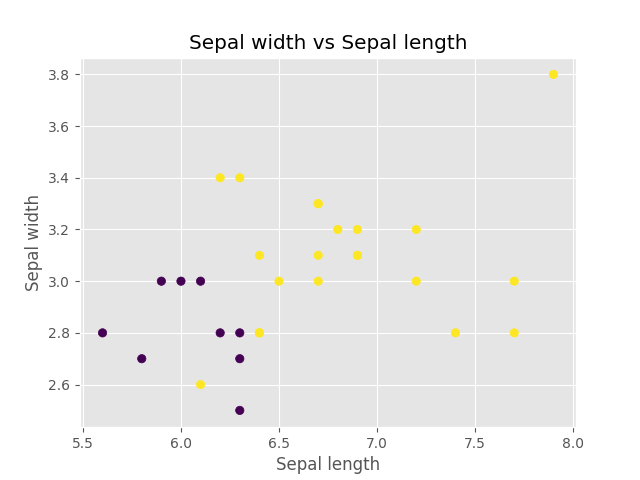

In [26]:
# Gráfico de disperssão entre as colunas Sepal Length , Sepatl width e a classe.
# Os pontos roxos são pontos no qual o classificador errou.
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[-30:,0],treino[-30:,1], c=clf.predict(teste))

# treino[-30:,0],treino[-30:,1]: Dados reais / cor usou o resultado da predição

<IPython.core.display.Javascript object>


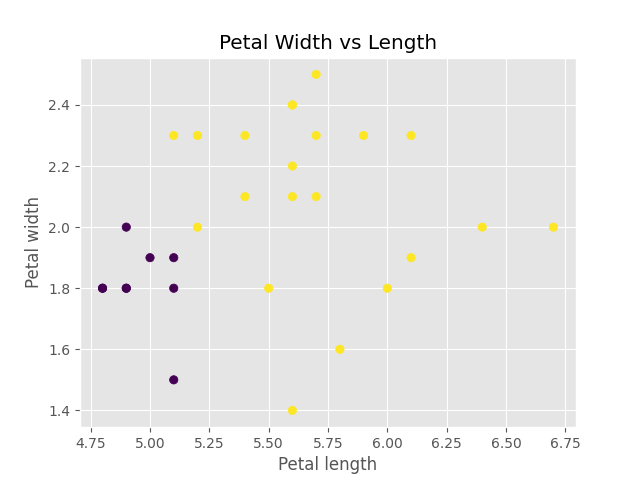

In [27]:
# Gráfico de disperssão entre as colunas Petal Length , Petal width e a classe.
# Os pontos roxos são pontos no qual o classificador errou.
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width vs Length')
plt.scatter(treino[-30:,2], treino[-30:,3], c=clf.predict(teste))

# treino[-30:,2], treino[-30:,3]: Dados reais / cor usou o resultado da predição

<IPython.core.display.Javascript object>


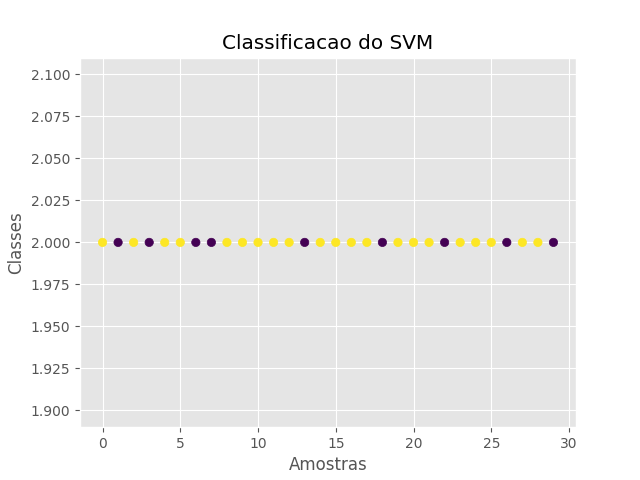

In [28]:
# Gráfico de instâncias e predição destas.
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
plt.xlabel('Amostras')
plt.ylabel('Classes')
plt.title('Classificacao do SVM')
plt.scatter(range(len(classes_teste)),classes_teste,c=clf.predict(teste))

# Só havia classe 2 na amostra
# len(classes_teste): Tamanho da amostra analisada: 30 itens

# Matriz de Confusão

In [29]:
print (pd.crosstab(classes_teste,clf.predict(teste),rownames=['Real'], colnames=['Predito'], margins=True),'')

Predito  1   2  All
Real               
2        9  21   30
All      9  21   30 


# 9.45 - SVM - Avaliando Modelos usando Cross Validation

# Cross Validation

In [30]:
# Função que retorna a acurácia após fazer uma validação cruzada (cross validation)
def Acuracia(clf,X,y):
    resultados = cross_val_predict(clf, X, y, cv=10)
    return metrics.accuracy_score(y,resultados)

In [31]:
Acuracia(clf,treino,classes)

0.9733333333333334

# Métricas de Avaliação

In [34]:
# Imprime as métricas: 'precisão, revocação e Medida F1.
resultados = cross_val_predict(clf,treino, classes, cv=10)
valor_classes = [0,1,2]
print (metrics.classification_report(classes,resultados,valor_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



# 9.46 - SVM - Analisando Dados de Músicas do Spotify

# Base de dados de músicas do Spotify

In [ ]:
# Informações das Features da Base de dados.
# https://developer.spotify.com/web-api/get-audio-features/

In [35]:
dataset = pd.read_csv(r'Módulo 09 - Machine Learning\material_apoio\SVM\data.csv', sep=',')

In [36]:
dataset.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


# Análise de Dados

In [37]:
#Checando valores Missing
dataset.isnull().sum()

id                  0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [38]:
# Resumo Estatístico da base
# Somente dados numéricos
dataset.describe()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [39]:
# lista estilos disponíveis do Matplotlib
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<IPython.core.display.Javascript object>


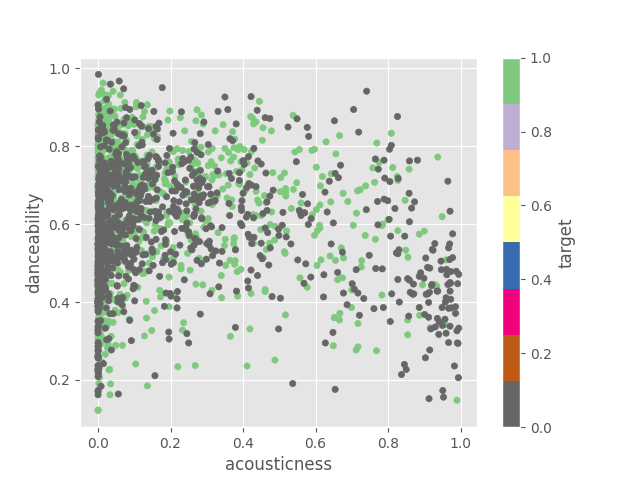

<AxesSubplot:xlabel='acousticness', ylabel='danceability'>

In [40]:
%matplotlib notebook
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='acousticness', y='danceability', c='target', kind='scatter', colormap='Accent_r')

<IPython.core.display.Javascript object>


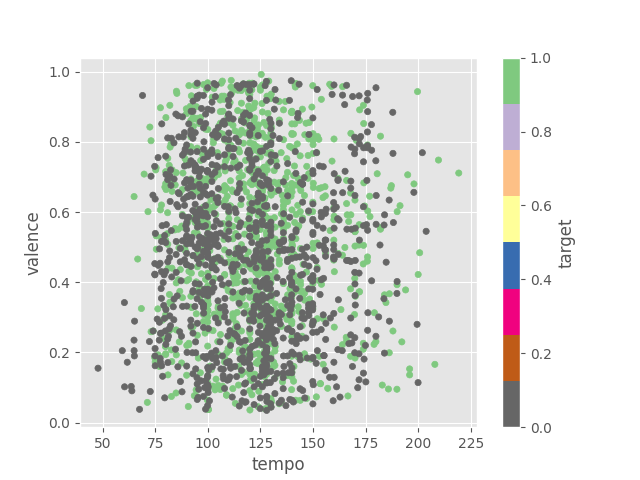

<AxesSubplot:xlabel='tempo', ylabel='valence'>

In [41]:
%matplotlib notebook
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='tempo', y='valence', c='target', kind='scatter' , colormap='Accent_r')

<IPython.core.display.Javascript object>


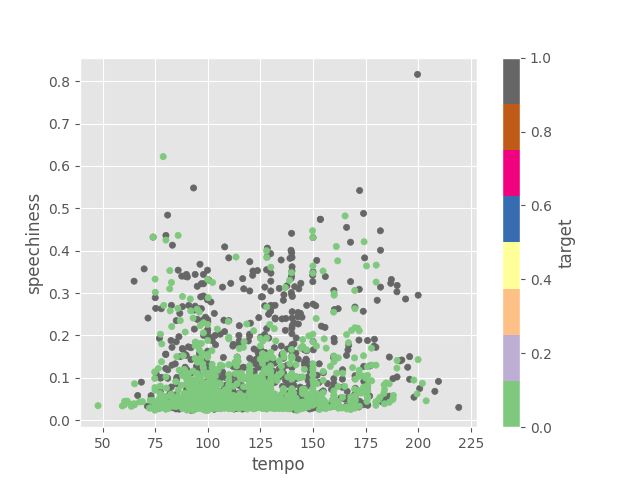

<AxesSubplot:xlabel='tempo', ylabel='speechiness'>

In [42]:
%matplotlib notebook
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='tempo', y='speechiness', c='target', kind='scatter' , colormap='Accent')

<IPython.core.display.Javascript object>


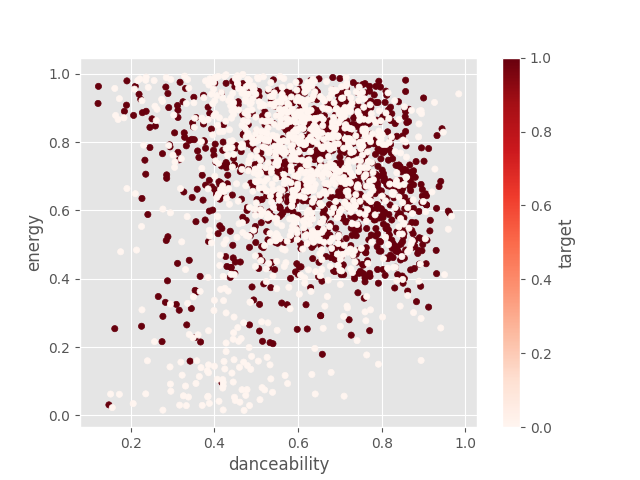

<AxesSubplot:xlabel='danceability', ylabel='energy'>

In [43]:
%matplotlib notebook
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='danceability', y='energy', c='target', kind='scatter' , colormap='Reds')

# 9.47 - SVM - Criando um Classificador de Músicas do Spotify

# Separa a classe dos dados

In [45]:
classes = dataset['target']
dataset.drop('target', axis=1, inplace=True)

# inplace=True: Apaga da memoria do dataset. Será definitivo.

In [47]:
dataset.head(5)

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Parallel Lines,Junior Boys


# Pre-processamento de dados

In [48]:
def remove_features(lista_features):
    for i in lista_features:
        dataset.drop(i, axis=1, inplace=True)
    return 0

In [49]:
# Remove features
remove_features(['id','song_title'])

0

In [51]:
# Visualizando o dataset
dataset.head(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys


In [52]:
# Visualizando o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  artist            2017 non-null   object 
dtypes: float64(10), int64(3), object(1)
memory usage: 220.7+ KB


# Label Encoder

* Técnica para codificar valores categoricos em numéricos
* Um exemplo seria: a lista de cores: _(‘branco’,’preto’,’amarelo’,’vermelho’,'branco')_
* Após aplicar o LabelEncoder esta seria algo como __(1,2,3,4,1)__

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
# Instanciando objeto
enc = LabelEncoder()

In [55]:
# Objeto que vai receber o método enc que vai transformar os dados categóricos em numéricos
inteiros = enc.fit_transform(dataset['artist'])

In [56]:
# Visualizando valores únicos.
set(inteiros)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [57]:
# Cria uma nova coluna chamada 'artist_inteiros'
dataset['artist_inteiros'] = inteiros

In [59]:
dataset.head(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys,628


In [60]:
remove_features(['artist'])

0

In [62]:
# Visualizando o Dataset alterado.
dataset.head(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,628


# 9.48 - SVM - Processando Dados Categóricos com o One hot Enconding

# One Hot Encoding

* Técnica usada para codificar valores categóricos em númericos.
* Cria uma matriz de presença.
* Resolve o problema __ordenação__ nos dados gerados pelo LabelEncoder. **< IMPORTANTE**

In [ ]:
# Apaque a coluna 'Artist'
remove_features(['artist'])

In [63]:
# Importa o pacote OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [64]:
# Instancia um objeto do tipo OnehotEncoder
ohe = OneHotEncoder()

In [65]:
# Transforma em array numpy o dataset.
dataset.values

array([[1.02000e-02, 8.33000e-01, 2.04600e+05, ..., 4.00000e+00,
        2.86000e-01, 4.49000e+02],
       [1.99000e-01, 7.43000e-01, 3.26933e+05, ..., 4.00000e+00,
        5.88000e-01, 2.22000e+02],
       [3.44000e-02, 8.38000e-01, 1.85707e+05, ..., 4.00000e+00,
        1.73000e-01, 4.49000e+02],
       ...,
       [8.57000e-03, 6.37000e-01, 2.07200e+05, ..., 4.00000e+00,
        4.70000e-01, 9.47000e+02],
       [1.64000e-03, 5.57000e-01, 1.85600e+05, ..., 4.00000e+00,
        6.23000e-01, 1.24200e+03],
       [2.81000e-03, 4.46000e-01, 2.04520e+05, ..., 4.00000e+00,
        4.02000e-01, 1.32000e+02]])

In [66]:
# Transforma em array numpy o dataset.
dataset_array = dataset.values

In [69]:
# Pegar o numero de linhas.
# Primeiro valor: n de linhas / Segundo Valor: n de colunas

num_rows = dataset_array.shape[0]; num_rows

2017

In [73]:
# Visualiza coluna de inteiros - Todas as colunas até a 13
dataset_array[:][:,13]

array([ 449.,  222.,  449., ...,  947., 1242.,  132.])

In [74]:
# Transforma a matriz em uma dimensão (por isso 1 no final)
inteiros = inteiros.reshape(len(inteiros),1); inteiros

array([[ 449],
       [ 222],
       [ 449],
       ...,
       [ 947],
       [1242],
       [ 132]])

In [75]:
# Criar as novas features a partir da matriz de presença
novas_features = ohe.fit_transform(inteiros)

In [76]:
# Imprime as novas features
# É uma matriz esparsa
novas_features

<2017x1343 sparse matrix of type '<class 'numpy.float64'>'
	with 2017 stored elements in Compressed Sparse Row format>

In [77]:
# Concatena as novas features ao array
dataset_array = np.concatenate([dataset_array, novas_features.toarray()], axis=1)

In [78]:
# Visualizando a quantidade de linhas e colunas da base
dataset_array.shape

(2017, 1357)

In [79]:
# Transforma em dataframe e visualiza as colunas
dataf = pd.DataFrame(dataset_array)

In [80]:
dataf.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356
0,0.01020,0.833,204600.0,0.434,0.021900,2.0,0.1650,-8.795,1.0,0.4310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.19900,0.743,326933.0,0.359,0.006110,1.0,0.1370,-10.401,1.0,0.0794,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.03440,0.838,185707.0,0.412,0.000234,2.0,0.1590,-7.148,1.0,0.2890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.60400,0.494,199413.0,0.338,0.510000,5.0,0.0922,-15.236,1.0,0.0261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.18000,0.678,392893.0,0.561,0.512000,5.0,0.4390,-11.648,0.0,0.0694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.00479,0.804,251333.0,0.560,0.000000,8.0,0.1640,-6.682,1.0,0.1850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.01450,0.739,241400.0,0.472,0.000007,1.0,0.2070,-11.204,1.0,0.1560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.02020,0.266,349667.0,0.348,0.664000,10.0,0.1600,-11.609,0.0,0.0371,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.04810,0.603,202853.0,0.944,0.000000,11.0,0.3420,-3.626,0.0,0.3470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.00208,0.836,226840.0,0.603,0.000000,7.0,0.5710,-7.792,1.0,0.2370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 9.49 - SVM - Aplicando o Get Dummies nos Dados

# Pandas Get_dummies

* Cria uma matriz de presença como feito com o OHE (One hot Enconding).
* Caso esteja usando dados do tipo numpy será necessário usar One hot Enconding.
* Dados tipo Pandas use Get_dummies

In [114]:
# Carregando os dados:
dataset = pd.read_csv(r'Módulo 09 - Machine Learning\material_apoio\SVM\data.csv', sep=',')

In [115]:
# Separando as classes:
classes = dataset['target']
dataset.drop('target', axis=1, inplace=True)

In [116]:
# Função para remover colunas desnecessárias:
def remove_features(lista_features):
    for i in lista_features:
        dataset.drop(i, axis=1, inplace=True)
    return 0

In [117]:
# Removendo as features:
remove_features(['id','song_title'])

0

In [118]:
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys


In [119]:
# Aplicando o get_dummies nos dados.
dataset = pd.get_dummies(dataset, columns=['artist'], prefix=['artist'])

In [120]:
# Visualizando 'features' geradas.
dataset.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness',
       ...
       'artist_alt-J', 'artist_deadmau5', 'artist_for KING & COUNTRY',
       'artist_one sonic society', 'artist_tUnE-yArDs', 'artist_tobyMac',
       'artist_권나무 Kwon Tree', 'artist_도시총각 Dosichonggak',
       'artist_카우칩스 The CowChips', 'artist_플랫핏 Flat Feet'],
      dtype='object', length=1356)

In [121]:
len(dataset.columns)

1356

In [122]:
# Visualizando as colunas
dataset.dtypes

acousticness                float64
danceability                float64
duration_ms                   int64
energy                      float64
instrumentalness            float64
                             ...   
artist_tobyMac                uint8
artist_권나무 Kwon Tree          uint8
artist_도시총각 Dosichonggak      uint8
artist_카우칩스 The CowChips      uint8
artist_플랫핏 Flat Feet          uint8
Length: 1356, dtype: object

In [123]:
# checando missing values
dataset.isnull().sum()

acousticness                0
danceability                0
duration_ms                 0
energy                      0
instrumentalness            0
                           ..
artist_tobyMac              0
artist_권나무 Kwon Tree        0
artist_도시총각 Dosichonggak    0
artist_카우칩스 The CowChips    0
artist_플랫핏 Flat Feet        0
Length: 1356, dtype: int64

# 9.50 - SVM - Criando Pipelines para Automatização de Fluxos de Dados

# Pipeline

In [124]:
# Importe as bibliotecas de Pipelines e Pré-processadores
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [125]:
# Treinando o algoritmo de SVM.
clf = svm.SVC().fit(dataset,classes)

# Método SVC() do SVM

In [126]:
clf

SVC()

In [127]:
Acuracia(clf,dataset,classes)

0.5577590480912246

In [128]:
# Criando um pipeline
pip_1 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC())
])

# Neste pipeline contem uma função StandardScaler() que vai aplicar o Scaler nos dados
# Após, irá treinar o algoritmo com o método SVC() do SVM

In [129]:
# Imprimindo Etapas do Pipeline
pip_1.steps

[('scaler', StandardScaler()), ('clf', SVC())]

In [130]:
# Chama a função acuracia passando os dados de musicas e as classes
# Usando o pipeline pip_1
Acuracia(pip_1,dataset,classes)

0.58601883986118

In [131]:
# Criando vários Pipelines
# Verificando qual configuração será melhor para estes dados
pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', svm.SVC())
])

pip_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

pip_4 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])

pip_5 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

# Testando o Desempenho dos Kernels - Get Dummies

In [132]:
# Chama a função acuracia passando os dados de musicas e as classes
# Usando o pipeline pip_2
Acuracia(pip_2,dataset,classes)

0.7223599405057015

In [133]:
# Testando o Kernel RBF
Acuracia(pip_3,dataset,classes)

0.58601883986118

In [134]:
# Teste de kernel poly
Acuracia(pip_4,dataset,classes)

0.5751115518096183

In [135]:
# Teste de Kernel linear
Acuracia(pip_5,dataset,classes)

0.6058502726822013

# 9.51 - SVM - Aplicando Pipelines com Label Encoder nos Dados

# Teste com apenas labelEncoder nos dados

In [136]:
# Carregando os dados:
dataset = pd.read_csv(r'Módulo 09 - Machine Learning\material_apoio\SVM\data.csv', sep=',')

In [137]:
# Separando as classes:
classes = dataset['target']
dataset.drop('target', axis=1, inplace=True)

In [138]:
# Função para remover colunas desnecessárias:
def remove_features(lista_features):
    for i in lista_features:
        dataset.drop(i, axis=1, inplace=True)
    return 0

In [139]:
# Removendo as features:
remove_features(['id','song_title'])

0

In [140]:
# Aplicando o Label Encoder
from sklearn.preprocessing import LabelEncoder

# Instanciando objeto
enc = LabelEncoder()

# Objeto que vai receber o método enc que vai transformar os dados categóricos em numéricos
inteiros = enc.fit_transform(dataset['artist'])

# Cria uma nova coluna chamada 'artist_inteiros'
dataset['artist_inteiros'] = inteiros

remove_features(['artist'])

0

In [141]:
dataset.head(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,628


# Testando o Desempenho dos Kernels - Label Encoder

In [142]:
# Teste com apenas LabelEncoder na coluna 'artist' usando o pipeline 'pip_1'
Acuracia(pip_1,dataset,classes)

0.7149231531978185

In [143]:
# Teste com apenas LabelEncoder na coluna 'artist' usando o pipeline 'pip_1'
Acuracia(pip_2,dataset,classes)

0.6757560733763014

In [144]:
# Testando o Kernel RBF
Acuracia(pip_3,dataset,classes)

0.7149231531978185

In [145]:
# Teste de kernel poly
Acuracia(pip_4,dataset,classes)

0.6683192860684184

In [146]:
# Teste de Kernel linear
Acuracia(pip_5,dataset,classes)

0.6236985622211205

# 9.63 - Machine Learning - Overfitting e Underfitting

## Teste de Overfitting

In [269]:
# Utiliza a função train_test_split para separar conjunto de treino e teste em 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, classes, test_size=0.2, random_state=123)

# test_size = 0.2: 20% dos dados
# random_state = 123: dados aleatórios, forma de aleatoriedade

In [271]:
X_train.head(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_inteiros
1505,0.00477,0.585,214740,0.614,0.000155,10,0.0762,-5.594,0,0.0370,114.059,4.0,0.2730,325
813,0.11400,0.665,216728,0.513,0.303000,0,0.1220,-7.314,1,0.3310,100.344,3.0,0.0373,765
615,0.03020,0.798,216585,0.481,0.000000,7,0.1280,-10.488,1,0.3140,127.136,4.0,0.6400,1285
319,0.10600,0.912,194040,0.317,0.000208,6,0.0723,-12.719,0,0.0378,99.346,4.0,0.9490,120
320,0.02110,0.697,236456,0.905,0.893000,6,0.1190,-7.787,0,0.0339,119.977,4.0,0.3110,440


In [273]:
y_train.head(5)

1505    0
813     1
615     1
319     1
320     1
Name: target, dtype: int64

In [272]:
X_test.head(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_inteiros
1423,0.00184,0.541,225427,0.609,0.000000,1,0.179,-3.715,1,0.1270,158.314,4.0,0.298,960
356,0.00855,0.293,202160,0.792,0.011100,7,0.133,-3.747,1,0.0363,161.933,4.0,0.696,455
854,0.93400,0.440,254360,0.433,0.811000,2,0.273,-17.453,0,0.0412,79.952,4.0,0.217,606
1445,0.09870,0.443,210884,0.727,0.000009,0,0.118,-5.171,0,0.0984,74.827,4.0,0.423,1027
1647,0.00346,0.723,176561,0.809,0.001230,7,0.565,-3.081,0,0.0625,98.007,4.0,0.271,751


In [274]:
y_test.head(5)

1423    0
356     1
854     1
1445    0
1647    0
Name: target, dtype: int64

In [275]:
# Scala os dados de treino e teste.
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler2 = StandardScaler().fit(X_test)
X_test = scaler2.transform(X_test)

In [276]:
# Treina o algoritmo
clf.fit(X_train, y_train)

SVC()

In [277]:
# Resultados de predição.
y_pred  = clf.predict(X_test)

In [278]:
# Imprime a acurácia.
metrics.accuracy_score(y_test,y_pred)

0.7351485148514851

## Verificando se houve Overfitting:
Testando a classificação com os próprios dados de treino

In [279]:
# Resultados de predição com dados de Treino
y_pred  = clf.predict(X_train)

In [280]:
# Imprime a Acurácia.
metrics.accuracy_score(y_train,y_pred)

# 81% é um resultado esperado uma vez que o algoritmo foi treinado com estes dados.
# Se fosse alg como 99% de acurácia, estaria sofrendo overfitting.

0.815251084934904

# 9.55 - SVM - Fazendo Tunning do Algoritmo SVM usando GridSearchCV

# Tunning

In [147]:
# Importa o utilitário GridSearchCV
from sklearn.model_selection import GridSearchCV

In [148]:
# Lista de Valores de C
lista_C = [0.001, 0.01, 0.1, 1, 10, 100]

# Lista de Valores de gamma
lista_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

# Poderia ser testado o kernel também: linear, rbf, poly

In [149]:
# Define um dicionário que recebe as listas de parâmetros e valores.
parametros_grid = dict(clf__C=lista_C, clf__gamma=lista_gamma)

In [150]:
parametros_grid

{'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
 'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [151]:
# Objeto Grid recebe parâmetros de Pipeline, e configurações de cross validation
grid = GridSearchCV(pip_3, parametros_grid, cv=10, scoring='accuracy')

In [152]:
# Aplica o gridsearch passando os dados de treino e classes.
grid.fit(dataset,classes)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

# Resultados de Grid

In [157]:
# Imprime os scores por combinações
grid.cv_results_

{'mean_fit_time': array([0.22051625, 0.20386741, 0.20456269, 0.21296518, 0.20983353,
        0.30761759, 0.20501976, 0.20219934, 0.20976846, 0.20674834,
        0.22977769, 0.32909477, 0.20269399, 0.18933437, 0.18403831,
        0.20568256, 0.23756158, 0.33393126, 0.19736528, 0.1786907 ,
        0.17075312, 0.23910577, 0.24975266, 0.33718607, 0.17489314,
        0.1662714 , 0.21051955, 0.2360136 , 0.23831723, 0.33788404,
        0.18175671, 0.25475366, 0.42581105, 0.23118515, 0.24153805,
        0.34095528]),
 'std_fit_time': array([0.01425239, 0.00458584, 0.00427173, 0.01284671, 0.00344123,
        0.01087246, 0.00475076, 0.00425966, 0.01557123, 0.01021661,
        0.00435678, 0.00742257, 0.0043834 , 0.00561505, 0.01154362,
        0.00407535, 0.00343171, 0.00327654, 0.0147048 , 0.01677104,
        0.02055254, 0.00526924, 0.00691972, 0.01021313, 0.00454603,
        0.00545734, 0.00771052, 0.00870898, 0.00534737, 0.00907145,
        0.0043363 , 0.00766411, 0.01914935, 0.00265299, 0.005

In [154]:
# Imprime os melhores parâmetros
grid.best_params_

{'clf__C': 100, 'clf__gamma': 0.01}

In [155]:
grid.best_score_

0.720858578395153

## KMeans - Agrupamento de Dados

# 9.58 - K-Means - Aplicando o K-means para Agrupamento de Dados

## Importando bibliotecas

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Carregando a base de dados iris

In [251]:
iris = pd.read_csv(r"Módulo 09 - Machine Learning\material_apoio\Kmeans\iris.csv")

In [252]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


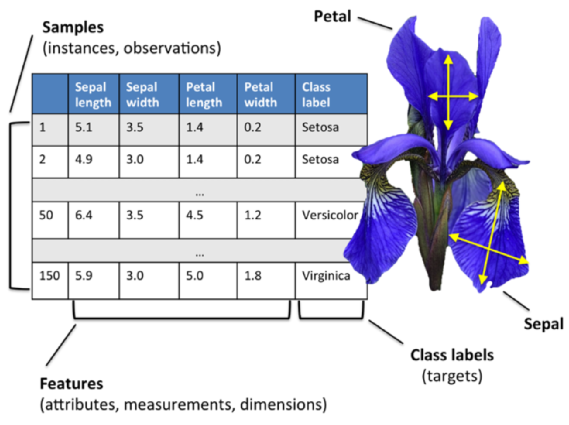

In [161]:
from IPython.display import Image
Image(filename =r"Módulo 09 - Machine Learning\material_apoio\Kmeans\iris-data-set.png", width=500, height=500)

## Separando os valores de dados e classes

In [253]:
X = iris.drop('Species',axis=1)
X[:10]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [254]:
y = iris.Species
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Convertendo valores categórios de classe em numéricos

In [255]:
def converte_classe(l):
    if l == 'Iris-setosa':
        return 0
    elif l == 'Iris-virginica':
        return 1
    elif l == 'Iris-versicolor':
        return 2

In [256]:
y = y.apply(converte_classe)
y.value_counts()

0    50
2    50
1    50
Name: Species, dtype: int64

## Instânciando o Algoritmo K-means com 3 clusters

In [257]:
kmeans = KMeans(n_clusters = 3, init = 'random')

# n_clusters: Agrupamento de 3 grupos, 3 classes

In [258]:
kmeans.fit(X)

KMeans(init='random', n_clusters=3)

## Centroids

In [259]:
# Valores de Centroids
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

## Tabela de distância

In [260]:
distance = kmeans.fit_transform(X)
distance

# fit_transform(X): Recebe os dados que estão armazenados na variável X como parâmetroe devolve o valor de distância de cada amostra e o seu respectivo centroid

array([[0.14694217, 5.0595416 , 3.41925061],
       [0.43816892, 5.11494335, 3.39857426],
       [0.41230086, 5.27935534, 3.56935666],
       [0.51883716, 5.15358977, 3.42240962],
       [0.19796969, 5.10433388, 3.46726403],
       [0.68380699, 4.68148797, 3.14673162],
       [0.41520116, 5.21147652, 3.51650264],
       [0.0599333 , 5.00252706, 3.33654987],
       [0.80099438, 5.32798107, 3.57233779],
       [0.36659514, 5.06790865, 3.3583767 ],
       [0.48784424, 4.89806763, 3.32449131],
       [0.25138019, 4.9966845 , 3.31126872],
       [0.49192682, 5.19103612, 3.46661272],
       [0.90906105, 5.65173594, 3.90578362],
       [1.02019214, 5.10804455, 3.646649  ],
       [1.21309192, 4.88564095, 3.49427881],
       [0.66241377, 5.03090587, 3.495248  ],
       [0.1509702 , 5.02342022, 3.38444981],
       [0.82848778, 4.61792995, 3.11245944],
       [0.39898872, 4.97213426, 3.37738931],
       [0.46172719, 4.6955761 , 3.07471224],
       [0.33762701, 4.9236821 , 3.31506588],
       [0.

In [261]:
distance[0]

array([0.14694217, 5.0595416 , 3.41925061])

## Visualizando valores de distância para cada cluster

<IPython.core.display.Javascript object>


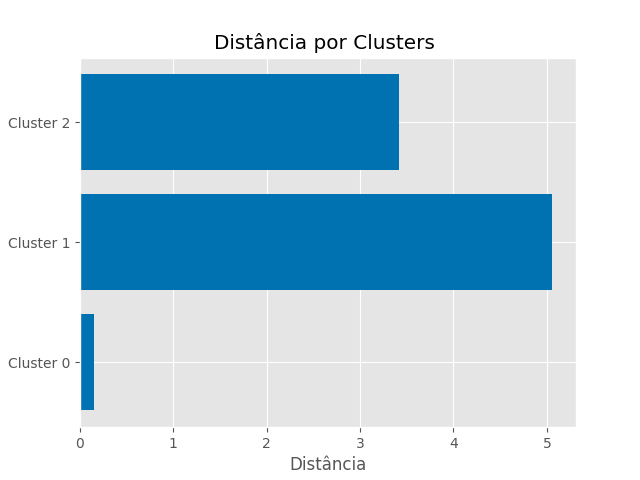

In [262]:
%matplotlib notebook
x = ['Cluster 0','Cluster 1','Cluster 2']
plt.barh(x,distance[0])
plt.xlabel('Distância')
plt.title('Distância por Clusters ')
plt.show()

# A primeira amostra da base de dados foi atribuída ao cluster 1
# Corresponde ao cluster de menor distância

## Imprimindo Rótulos

In [263]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

## Visualizando os Centroids

<IPython.core.display.Javascript object>


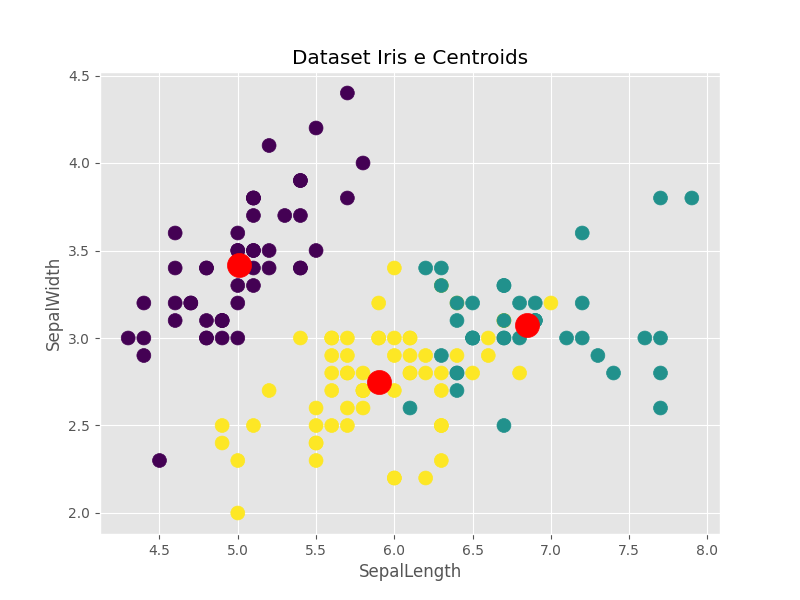

In [264]:
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.scatter(X['SepalLength'], X['SepalWidth'], s = 100, c = kmeans.labels_) 
# C=cor correspondente ao label
# s=size (tamanho da marcação no gráfico)

# Plotando os valores dos centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')

plt.title('Dataset Iris e Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

## Agrupando novos dados

In [265]:
data = [
        [ 4.12, 3.4, 1.6, 0.7],
        [ 5.2, 5.8, 5.2, 6.7],
        [ 3.1, 3.5, 3.3, 3.0]
    ]
kmeans.predict(data)

# Variável kmeans já está treinada

# Primeira instancia atribuída ao cluster 0
# Segunda instancia atribuída ao cluster 1
# Terceira instancia atribuída ao cluster 2

array([0, 1, 2])

## Visualizando os resultados

<IPython.core.display.Javascript object>


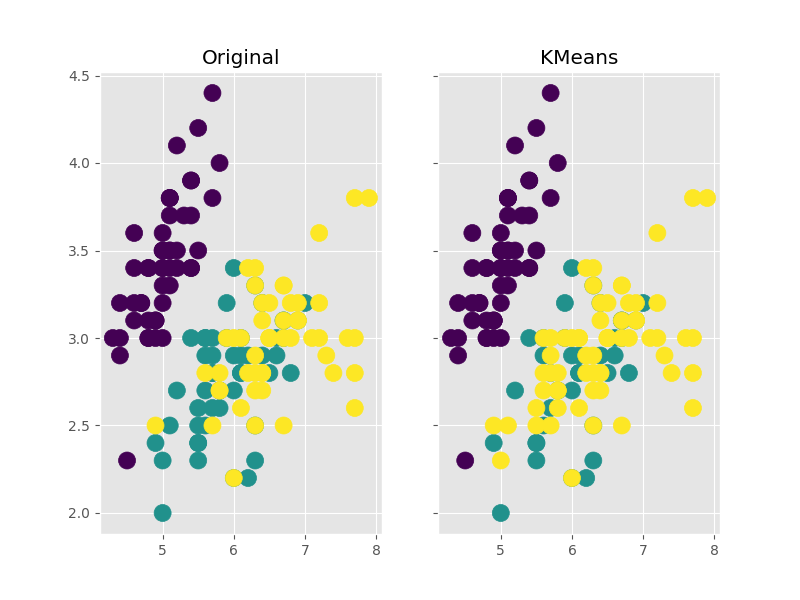

In [266]:
%matplotlib notebook
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
ax1.set_title('Original')
ax1.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=sorted(y))
ax2.set_title('KMeans')
ax2.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=sorted(kmeans.labels_))

# 9.59 - K-Means - Estimando o Valor do K para Aplicar o K-means

## Estimando o valor do parametro K - Método Elbow

1 680.8243999999996
2 152.36870647733915
3 78.94084142614601
4 57.34540931571815
5 46.535582051282034
6 38.93873974358975
7 34.299985543844244
8 32.185490259740256
9 28.152740259740277
10 26.31326563142741


<IPython.core.display.Javascript object>


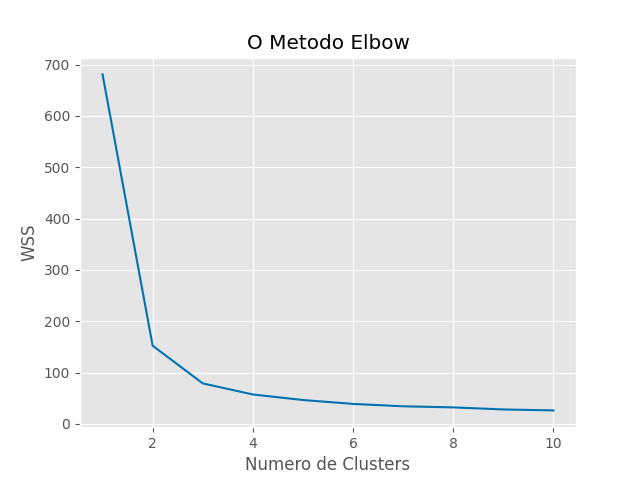

In [176]:
# Muitas vezes não se sabe quantos clusters será adotado, sendo necessário o método Elbow.

%matplotlib notebook

# Lista que irá acumular os valores dos erros quadráticos
wcss = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters = i, init = 'random')
    kmeans2.fit(X)
    print (i,kmeans2.inertia_)
    wcss.append(kmeans2.inertia_)

# inertia_: Erro quadrático

plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

# A partir de 3 clusters a distância dos erros quadráticos se estabiliza (Elbow=Formação do cotovelo)

## Técnicas de Validação

### Matriz de Confusão

In [267]:
print (pd.crosstab(y,kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0        50   0   0   50
1         0  36  14   50
2         0   2  48   50
All      50  38  62  150


### Metricas de classificação

In [268]:
from sklearn import metrics
clusters = ['Cluster 2','Cluster 1','Cluster 0']
print(metrics.classification_report(y,kmeans.labels_,target_names=clusters))

              precision    recall  f1-score   support

   Cluster 2       1.00      1.00      1.00        50
   Cluster 1       0.95      0.72      0.82        50
   Cluster 0       0.77      0.96      0.86        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



## Naive Bayes

# 9.66 - Naive Bayes - Aplicando Análise de Sentimentos Utilizando um Classificador Naive Bayes

## Análise de Sentimentos

In [281]:
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

**Ler arquivo de dados e conta a quantidade de linhas**

- O sentimento de cada twitte foi manualmente rotulado pela equipe que coletou os dados.

In [282]:
dataset = pd.read_csv(r'Módulo 09 - Machine Learning\material_apoio\NaiveBayes\Tweets_Mg.csv',encoding='utf-8')

In [283]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8199 non-null   int64  
 1   Created At                 8199 non-null   object 
 2   Text                       8199 non-null   object 
 3   Geo Coordinates.latitude   104 non-null    float64
 4   Geo Coordinates.longitude  104 non-null    float64
 5   User Location              5489 non-null   object 
 6   Username                   8199 non-null   object 
 7   User Screen Name           8199 non-null   object 
 8   Retweet Count              8199 non-null   int64  
 9   Classificacao              8199 non-null   object 
 10  Observação                 1 non-null      object 
 11  Unnamed: 10                0 non-null      float64
 12  Unnamed: 11                0 non-null      float64
 13  Unnamed: 12                0 non-null      float

In [284]:
# Expante o tamanho de exibição de coluna de texto
pd.set_option('display.max_colwidth', -1)
dataset.Text.head(100)

0     ���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ                                                         
1     � @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf                                                                             
2     �� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw                                                                            
3     ��� https://t.co/BnDsO34qK0                                                                                                                
4     ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas https://t.co/DMg7BGsek5             
                                                                   ...                                                                           
95    #noticiasdorenan Uso de depósitos judiciais pelo governo tem nova polêmica em MG: O Banco… https://t.co/kHuZpKQaj5    

**Excluir Linhas duplicadas**

In [285]:
dataset.drop_duplicates(['Text'],inplace=True)

In [286]:
dataset.count()

Unnamed: 0                   5765
Created At                   5765
Text                         5765
Geo Coordinates.latitude     104 
Geo Coordinates.longitude    104 
User Location                3851
Username                     5765
User Screen Name             5765
Retweet Count                5765
Classificacao                5765
Observação                   1   
Unnamed: 10                  0   
Unnamed: 11                  0   
Unnamed: 12                  0   
Unnamed: 13                  0   
Unnamed: 14                  0   
Unnamed: 15                  0   
Unnamed: 16                  0   
Unnamed: 17                  0   
Unnamed: 18                  0   
Unnamed: 19                  0   
Unnamed: 20                  0   
Unnamed: 21                  0   
Unnamed: 22                  0   
Unnamed: 23                  0   
Unnamed: 24                  0   
dtype: int64

**Removendo Colunas desnecessárias**

In [287]:
for i in dataset.columns.values:
    if i.startswith('Unnamed'):
        dataset.drop(i, axis=1, inplace=True)
        print ('Colunas Deletadas:', i)

Colunas Deletadas: Unnamed: 0
Colunas Deletadas: Unnamed: 10
Colunas Deletadas: Unnamed: 11
Colunas Deletadas: Unnamed: 12
Colunas Deletadas: Unnamed: 13
Colunas Deletadas: Unnamed: 14
Colunas Deletadas: Unnamed: 15
Colunas Deletadas: Unnamed: 16
Colunas Deletadas: Unnamed: 17
Colunas Deletadas: Unnamed: 18
Colunas Deletadas: Unnamed: 19
Colunas Deletadas: Unnamed: 20
Colunas Deletadas: Unnamed: 21
Colunas Deletadas: Unnamed: 22
Colunas Deletadas: Unnamed: 23
Colunas Deletadas: Unnamed: 24


In [288]:
# Visualizando as colunas do dataset
dataset.columns

Index(['Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação'],
      dtype='object')

**Distribuição das classes neutros, positivos e negativos**

<AxesSubplot:>

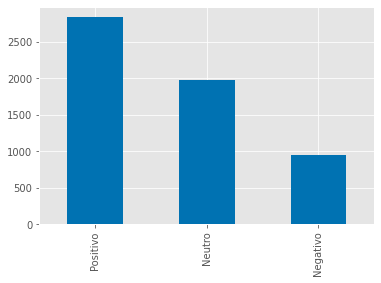

In [289]:
%matplotlib inline
dataset.Classificacao.value_counts().plot(kind='bar')

**Separando tweets e suas classes**

In [290]:
tweets = dataset['Text']
classes = dataset['Classificacao']

**Gerando o modelo**

In [291]:
# Instanciando a variável vectorizer
vectorizer = CountVectorizer(analyzer="word")

# Método que pega os dados de texto e transforma em vetor
freq_tweets = vectorizer.fit_transform(tweets)

In [292]:
type(freq_tweets)

# Foi criada uma matriz esparça onde cada palavra virou uma coluna

scipy.sparse.csr.csr_matrix

In [293]:
freq_tweets.shape

(5765, 13029)

In [294]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**Cria um modelo usando Naive Bayes Multinomial**

In [295]:
# Instanciando o tipo de Naive Bayes adotado: Multinomial
# Este algoritmo contabiliza a frequencia dos termos na hora de treinar o modelo
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

**Testando o modelo com algumas instâncias simples**

In [296]:
# defina instâncias de teste dentro de uma lista
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

In [297]:
# Transforma os dados de teste em vetores de palavras.
freq_testes = vectorizer.transform(testes)

In [298]:
# Fazendo a classificação com o modelo treinado - Diretamente
modelo.predict(freq_testes)

array(['Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro'], dtype='<U8')

In [299]:
# Fazendo a classificação com o modelo treinado.
for t, c in zip (testes,modelo.predict(freq_testes)):
    print (t +", "+ c)

Esse governo está no início, vamos ver o que vai dar, Neutro
Estou muito feliz com o governo de Minas esse ano, Neutro
O estado de Minas Gerais decretou calamidade financeira!!!, Negativo
A segurança desse país está deixando a desejar, Neutro
O governador de Minas é mais uma vez do PT, Neutro


In [300]:
# Probabilidades de cada classe
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.18, 0.82, 0.  ],
       [0.02, 0.98, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.1 , 0.89, 0.01],
       [0.15, 0.85, 0.  ]])

# 9.68 - Naive Bayes - Avaliando o Classificador de Análise de Sentimentos de Tweets

## Avaliação do modelo

* Usaremos a técnica de Cross Validation para avaliação dos modelos.
* Esta técnica será usada com 10 folds.

**Fazendo o cross validation do modelo**

In [301]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

**Matriz de confusão**

In [302]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo  846       100     5         951 
Neutro    206       1656    112       1974
Positivo  53        294     2493      2840
All       1105      2050    2610      5765


**Métricas de validação do modelo**

In [303]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.96      0.88      0.91      2840
    Negativo       0.77      0.89      0.82       951
      Neutro       0.81      0.84      0.82      1974

    accuracy                           0.87      5765
   macro avg       0.84      0.87      0.85      5765
weighted avg       0.87      0.87      0.87      5765



# 9.69 - Naive Bayes - Fazendo Tunning no Algoritmo e Avaliando os Resultados

## Tunning do Naive Bayes

In [304]:
from sklearn.model_selection import GridSearchCV

**Defina uma lista de valores de Alpha**

In [305]:
lista_alpha = list(range(1,11))
lista_alpha

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

**Cria um dicionario com o nome do parametro e a lista de valores**

In [309]:
parametros_grid = dict(alpha=lista_alpha); parametros_grid

{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

**Instancia um modelo**

In [307]:
nvModelo = MultinomialNB()

**Cria o objeto Grid**

In [308]:
grid = GridSearchCV(nvModelo, parametros_grid, cv=10, scoring='accuracy')

**Roda o Grid**

In [310]:
# vectorizer: Irá transformar em uma matriz esparsa
freq_tweets = vectorizer.fit_transform(tweets)

# Realizando o treino e testando as configurações de alpha e validação cruzada (cv=10)
grid.fit(freq_tweets, classes)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

**Melhores Scores**

In [311]:
grid.cv_results_

{'mean_fit_time': array([0.0127574 , 0.01506763, 0.01186249, 0.0110734 , 0.01156912,
        0.0132612 , 0.022944  , 0.01755297, 0.01406586, 0.01245933]),
 'std_fit_time': array([0.0013208 , 0.00248427, 0.00103093, 0.00030859, 0.00101337,
        0.00126372, 0.01135173, 0.00411764, 0.00206163, 0.00101895]),
 'mean_score_time': array([0.0009021 , 0.00099633, 0.00099938, 0.00089703, 0.00109389,
        0.00119994, 0.00159001, 0.00109718, 0.00069747, 0.00110493]),
 'std_score_time': array([0.00053973, 0.00044601, 0.00043878, 0.00029901, 0.00053199,
        0.00075027, 0.00111285, 0.00053744, 0.0004566 , 0.00029796]),
 'param_alpha': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 1},
  {'alpha': 2},
  {'alpha': 3},
  {'alpha': 4},
  {'alpha': 5},
  {'alpha': 6},
  {'alpha': 7},
  {'alpha': 8},
  {'alpha'

**Melhores parâmetros**

In [312]:
grid.best_params_

{'alpha': 1}

In [313]:
grid.best_score_

0.8664846307529368

# 9.70 - Naive Bayes - Estudo de Caso de Alteração do Parâmetro Alpha e Recomendações para Melhoria de Modelos

### Validando o Tunning do Algoritmo

In [314]:
# Instanciando a variável vectorizer
vectorizer = CountVectorizer(analyzer="word")

# vectorizer: Irá transformar em uma matriz esparsa
freq_tweets = vectorizer.fit_transform(tweets)

# Instanciando o Modelo
modelo = MultinomialNB(alpha=5)

# Treinando o Modelo
modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=5)

In [315]:
# Repetindo os testes para as 5 frases aleatórias
freq_testes = vectorizer.transform(testes)

In [316]:
# Fazendo a classificação com o modelo treinado.
modelo.predict(freq_testes)

array(['Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro'], dtype='<U8')

In [317]:
# Refazendo a Validação Cruzada com 10 folds
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [318]:
sentimento=['Positivo','Negativo','Neutro']
print (metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.89      0.92      0.90      2840
    Negativo       0.84      0.78      0.81       951
      Neutro       0.79      0.79      0.79      1974

    accuracy                           0.85      5765
   macro avg       0.84      0.83      0.83      5765
weighted avg       0.85      0.85      0.85      5765



**Considerações Finais**

* Considere aumentar a quantidade de dados de treino.

* Pela sua simplicidade o Naive Bayes pode ser usado perfeitamente como um algoritmo de Baseline.

* Considere alterar os parâmetros do algoritmo.

* Em tarefas de classificação de textos considere utilizar outras modelagens como Bigrams por exemplo.

* Em tarefas envolvendo textos outras técnicas como stemming ou remoção de stoptowords podem dar bons resultados.